Face_estimation for Google Colab

https://google.github.io/mediapipe/

In [ ]:
!mkdir "save_imgs"
!mkdir "load_imgs"
!mkdir "save_movie1"
!mkdir "save_movie2"
!mkdir "load_movie"

*   let image files in "load_imgs" 
*   let movie file in "load_movie" 



In [ ]:
!apt-get update && apt-get install imagemagick

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

#mediapipe for face estimation

In [ ]:
pip install mediapipe

     |████████████████████████████████| 32.7 MB 241 kB/s 


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
file_list = []
import glob

files = glob.glob("load_imgs/*")
for file in files:
    print(file)
    file_list.append(file)

load_imgs/gakki3.jpg
load_imgs/beethoven.jpeg


In [ ]:
imgs_num_list=[]
human_num_list =[]
position_list=[]
x_list=[]
y_list=[]
z_list=[]


# For static images:
IMAGE_FILES = file_list
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    human_num=0
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    blank = np.array(np.zeros(annotated_image.shape))

    for face_landmarks in results.multi_face_landmarks:
      #print('face_landmarks:', face_landmarks)

      for i in range(len(str(face_landmarks).split('landmark'))):
        cnt=0
        if str(face_landmarks).split('landmark')[i] != "":
          

          
          imgs_num_list.append(idx)
          human_num_list.append(human_num)
          position_list.append(cnt)
          x_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[2]))
          y_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[4]))
          z_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[6]))
          cnt+=1
      human_num +=1

      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('save_imgs/annotated_image' + str(idx).zfill(8) + '.png', blank)

  

In [ ]:
df = pd.DataFrame(imgs_num_list,columns=["image_num"])
df["human_num"]=human_num_list
df["position_list"]=position_list
df["x"]= x_list
df["y"]= y_list
df["z"]= z_list
df

,image_num,human_num,position_list,x,y,z
0,0,0,0,0.494422,0.782683,-0.052717
1,0,0,0,0.493995,0.703601,-0.112715
2,0,0,0,0.494154,0.724742,-0.052912
3,0,0,0,0.472787,0.618643,-0.091743
4,0,0,0,0.493352,0.678883,-0.122498
...,...,...,...,...,...,...
951,1,0,0,0.566803,0.281272,-0.019034
952,1,0,0,0.579625,0.279514,-0.019034
953,1,0,0,0.565032,0.272046,-0.019034
954,1,0,0,0.553992,0.282933,-0.019034


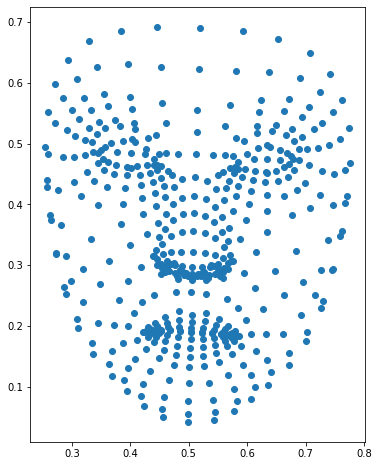

In [ ]:
df_0 = df[df["image_num"]==0]
plt.figure(figsize=(6,8))
plt.scatter((1-df_0["x"].values), (1-df_0["y"].values))
plt.show();

For movie

In [ ]:
#select movie file 
video= "load_movie/movie11.mov"

In [ ]:
cap = cv2.VideoCapture(video)

#if not cap.isOpened():
    #pass

base_path = os.path.join("save_movie1", "sample_video_img")

digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))
n = 0

while True:
    ret, frame = cap.read()
    if ret:
        cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(10), "png"), frame)
        n += 1
    else:
        break


In [ ]:
file_list = []
import glob

files = glob.glob("save_movie1/*")
for file in files:
    #print(file)
    file_list.append(file)
    file_list.sort()

save_movie1/sample_video_img_0000000029.png
save_movie1/sample_video_img_0000000150.png
save_movie1/sample_video_img_0000000328.png
save_movie1/sample_video_img_0000000307.png
save_movie1/sample_video_img_0000000146.png
save_movie1/sample_video_img_0000000144.png
save_movie1/sample_video_img_0000000142.png
save_movie1/sample_video_img_0000000303.png
save_movie1/sample_video_img_0000000206.png
save_movie1/sample_video_img_0000000032.png
save_movie1/sample_video_img_0000000037.png
save_movie1/sample_video_img_0000000115.png
save_movie1/sample_video_img_0000000052.png
save_movie1/sample_video_img_0000000200.png
save_movie1/sample_video_img_0000000089.png
save_movie1/sample_video_img_0000000006.png
save_movie1/sample_video_img_0000000236.png
save_movie1/sample_video_img_0000000087.png
save_movie1/sample_video_img_0000000026.png
save_movie1/sample_video_img_0000000043.png
save_movie1/sample_video_img_0000000254.png
save_movie1/sample_video_img_0000000252.png
save_movie1/sample_video_img_000

In [ ]:
imgs_num_list=[]
human_num_list =[]
position_list=[]
x_list=[]
y_list=[]
z_list=[]


# For static images:
IMAGE_FILES = file_list
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    human_num=0
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    blank = np.array(np.zeros(annotated_image.shape))

    for face_landmarks in results.multi_face_landmarks:
      #print('face_landmarks:', face_landmarks)

      for i in range(len(str(face_landmarks).split('landmark'))):
        cnt=0
        if str(face_landmarks).split('landmark')[i] != "":
          
          
          imgs_num_list.append(idx)
          human_num_list.append(human_num)
          position_list.append(cnt)
          x_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[2]))
          y_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[4]))
          z_list.append(float(re.split('[:\n]',str(face_landmarks).split('landmark')[i])[6]))
          cnt+=1
      human_num +=1

      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=blank,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite('save_movie2/annotated_image' + str(idx).zfill(8) + '.png', blank)

In [ ]:
df = pd.DataFrame(imgs_num_list,columns=["image_num"])
df["human_num"]=human_num_list
df["position_list"]=position_list
df["x"]= x_list
df["y"]= y_list
df["z"]= z_list
df.tail()

,image_num,human_num,position_list,x,y,z
156779,327,0,0,0.644396,0.560277,-0.00429
156780,327,0,0,0.653719,0.560304,-0.00429
156781,327,0,0,0.644376,0.544926,-0.00429
156782,327,0,0,0.635242,0.560057,-0.00429
156783,327,0,0,0.644480,0.575437,-0.00429


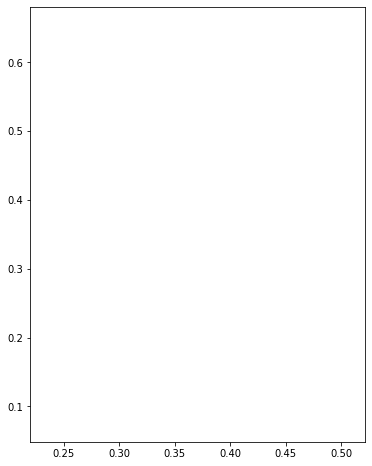

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML


fig = plt.figure(figsize=(6,8)) # edit depending on aspect ratio

ims = []

for i in range(df["image_num"].max()):
    df_0 = df[df["image_num"]== i] 
    x = df_0["x"].values
    y = df_0["y"].values
    im = plt.scatter(1-x, 1-y, color='blue')
    ims.append([im]) 


ani = animation.ArtistAnimation(fig, ims, interval=30, repeat_delay=1000) #edit interval as FPS
ani.save("sample2.gif" , writer="pillow")

plt.show();
